In [1]:
%matplotlib inline
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up figures

In [2]:
# to change the plot style
# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_style("ticks")

fig_width_pt = 455.2  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
#fig_width = 9
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
global_figsize = fig_size
params = {'font.family':"Latin Modern Roman",
          'font.size': 10,
          'figure.titlesize': 10,
          'axes.titlesize': 10,
          'legend.fontsize': 10,
          'axes.labelsize': 10,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'savefig.bbox':"tight",
          'figure.figsize': fig_size,}
plt.rcParams.update(params)

def savefig(name: str):
    filename = 'figures/{}.pdf'.format(name)
    plt.savefig(filename, bbox_inches = 'tight')

# see also pgf export/plot

In [3]:
[k for k in plt.rcParams.keys() if "title" in k]

['axes.titlepad',
 'axes.titlesize',
 'axes.titleweight',
 'figure.titlesize',
 'figure.titleweight',
 'legend.title_fontsize']

## Read in dataframe

In [4]:
df = pd.read_csv("results_df.csv")
df.head()

,filltype,fill,ndatapts,ttotal,tksearch,tfrsearch,tprocessing,listmethod,memory,method
0,full,100,250000,2.06572,0.0,0.0,0.0,-1,116.740,CLL
1,full,100,250000,2.16067,0.0,0.0,0.0,-1,116.784,CLL
2,full,100,250000,2.11499,0.0,0.0,0.0,-1,116.780,CLL
3,full,100,250000,2.17325,0.0,0.0,0.0,-1,116.748,CLL
4,full,100,250000,2.16133,0.0,0.0,0.0,-1,116.704,CLL


# Figures
## Scatter memory vs. total runtime

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


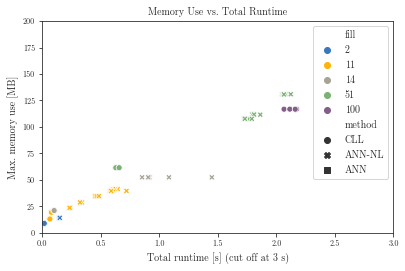

In [5]:
fig,ax = plt.subplots()
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.scatterplot(data=df,y="memory",x="ttotal",ax = ax, style="method",hue="fill", palette = sns.xkcd_palette(colors));
ax.set_xlim((0,3))
ax.set_ylim((0,200))
ax.set(ylabel='Max. memory use [MB]', xlabel='Total runtime [s] (cut off at 3 s)')
plt.title("Memory Use vs. Total Runtime")
savefig('memory_vs_totalruntime')
plt.show()

## Total time of individual test runs

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


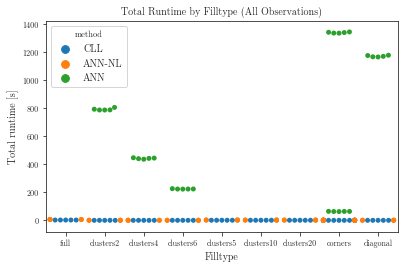

In [6]:
fig, ax1 = plt.subplots()

ax1 = sns.swarmplot(x="filltype", y="ttotal", hue="method", dodge=False,
                data=df)

ax1.set(ylabel='Total runtime [s]', xlabel='Filltype')
#plt.xticks(rotation=45)
plt.title("Total Runtime by Filltype (All Observations)")
savefig('totalruntime_all')
plt.show()

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


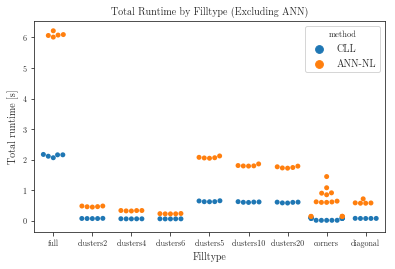

In [7]:
fig, ax1 = plt.subplots()

ax1 = sns.swarmplot(x="filltype", y="ttotal", hue="method", dodge=False,
                data=df[df["method"] != "ANN"])

ax1.set(ylabel='Total runtime [s]', xlabel='Filltype')
plt.title("Total Runtime by Filltype (Excluding ANN)")
#plt.savefig('figures/totalruntime_noann.pdf')
savefig('totalruntime_noann')
plt.show()

There is very little variance between runs of the tests in the total runtime. So we can group them, take the mean and work with that data.

## Memory use of individual test runs

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


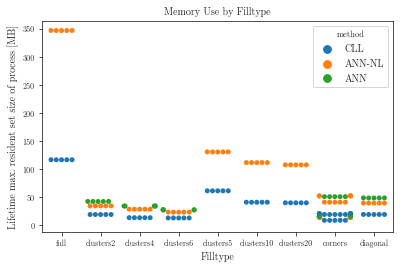

In [8]:
fig, ax1 = plt.subplots()

ax1 = sns.swarmplot(x="filltype", y="memory", hue="method", dodge=False,
                data=df)

ax1.set(ylabel='Lifetime max. resident set size of process [MB]', xlabel='Filltype')
plt.title("Memory Use by Filltype")
savefig('memory_all')
plt.show()

## ANN runtime split into search and list processing

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


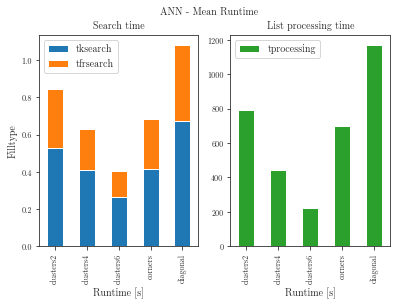

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2)
df[df.method == 'ANN'].groupby('filltype').mean().plot(kind='bar',
                               y=['tksearch',
                                  'tfrsearch'],
                               stacked=True,
                               title='Search time',ax = ax1);
df[df.method == 'ANN'].groupby('filltype').mean().plot(kind='bar',
                               y='tprocessing',
                               legend=True,
                               color=sns.color_palette()[2],
                               title='List processing time',ax = ax2);
ax1.set(xlabel='Runtime [s]', ylabel='Filltype')
ax2.set(xlabel='Runtime [s]', ylabel='')
plt.suptitle("ANN - Mean Runtime")
savefig('ann_splitruntime')
plt.show()

## ANN-NL search and processing time compared to ANN

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


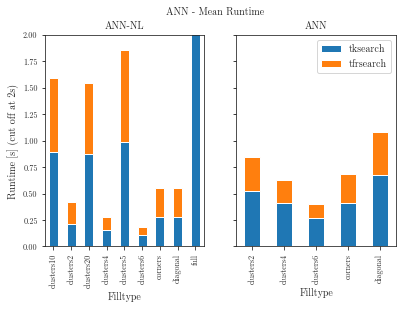

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=global_figsize, sharey=True)
x_range = (0,2)

df[df.method == 'ANN-NL'].groupby('filltype').mean().plot(kind='bar',
                               y=['tksearch',
                                  'tfrsearch'],
                               stacked=True, legend=False,
                               title='ANN-NL',ax = ax1);
df[df.method == 'ANN'].groupby('filltype').mean().plot(kind='bar',
                               y=['tksearch',
                                  'tfrsearch'],
                               stacked=True,
                               title='ANN',ax = ax2);

plt.suptitle("ANN - Mean Runtime")
y_range = (0,2)
ax1.set_ylim(x_range)
ax2.set_ylim(x_range)
ax1.set(ylabel='Runtime [s] (cut off at 2s)', xlabel='Filltype')
ax2.set(ylabel='', xlabel='Filltype')
savefig('runtime_ann_annnl')
plt.show()

As evident in the plot above, and the following tables comparing the cluster6 case at 11% fill, ANN-NL seems to have a speed advantace of ANN during the tksearch and tfrsearch phases (obviously not in the processsing). Why is that? Compiler optimization??

In [11]:
db = df.groupby(["fill", "filltype", "method"])
df.iloc[db.groups[(11, 'clusters6', 'ANN')]]

,filltype,fill,ndatapts,ttotal,tksearch,tfrsearch,tprocessing,listmethod,memory,method
120,clusters6,11,27648,223.436,0.264468,0.137192,222.972,0,27.584,ANN
121,clusters6,11,27648,223.363,0.262670,0.139991,222.905,0,27.472,ANN
122,clusters6,11,27648,226.150,0.269343,0.140490,225.682,0,27.644,ANN
123,clusters6,11,27648,222.900,0.262467,0.140437,222.438,0,27.564,ANN
124,clusters6,11,27648,223.764,0.265014,0.138556,223.304,0,27.400,ANN


In [12]:
df.iloc[db.groups[(11, 'clusters6', 'ANN-NL')]]

,filltype,fill,ndatapts,ttotal,tksearch,tfrsearch,tprocessing,listmethod,memory,method
70,clusters6,11,27648,0.229880,0.103250,0.077869,0.000684,-1,23.424,ANN-NL
71,clusters6,11,27648,0.229351,0.102927,0.077092,0.000683,-1,23.348,ANN-NL
72,clusters6,11,27648,0.230810,0.103446,0.078010,0.000695,-1,23.456,ANN-NL
73,clusters6,11,27648,0.241964,0.108903,0.083010,0.000808,-1,23.560,ANN-NL
74,clusters6,11,27648,0.235978,0.106525,0.080122,0.000709,-1,23.512,ANN-NL


## Search time compared to list processing time
Beachte Achsenskalierung!

## Effect of filltype, for 11% fill

In [13]:
df[df["fill"] == 11].groupby(["method", "filltype"]).mean()

fill  ndatapts       ttotal  tksearch  tfrsearch  \
method filltype                                                      
ANN    clusters2    11     27648   792.699000  0.528472   0.315752   
       clusters4    11     27648   442.043200  0.407967   0.220007   
       clusters6    11     27648   223.922600  0.264792   0.139333   
       corners      11     28158  1340.394000  0.704798   0.445047   
       diagonal     11     29424  1172.074000  0.672469   0.410278   
ANN-NL clusters2    11     27648     0.470646  0.215278   0.203321   
       clusters4    11     27648     0.333703  0.153222   0.129588   
       clusters6    11     27648     0.233597  0.105010   0.079221   
       corners      11     28158     0.619869  0.283552   0.284498   
       diagonal     11     29424     0.610629  0.280569   0.275499   
CLL    clusters2    11     27648     0.078372  0.000000   0.000000   
       clusters4    11     27648     0.067759  0.000000   0.000000   
       clusters6    11     27648     0.066576  0.000000   0.000000   
       corners      11     28158     0.080319  0.000000   0.000000   
       diagonal     11     29424     0.080480  0.000000   0.000000   

                  tprocessing  listmethod   memory  
method filltype                                     
ANN    clusters2   791.792800           0  42.4552  
       clusters4   441.355800           0  34.3024  
       clusters6   223.460200           0  27.5328  
       corners    1339.178000           0  51.0096  
       diagonal   1170.922000           0  48.7464  
ANN-NL clusters2     0.000725          -1  34.5464  
       clusters4     0.000700          -1  28.6176  
       clusters6     0.000716          -1  23.4600  
       corners       0.000800          -1  41.1448  
       diagonal      0.000794          -1  39.5344  
CLL    clusters2     0.000000          -1  19.1832  
       clusters4     0.000000          -1  13.4952  
       clusters6     0.000000          -1  13.0264  
       corners       0.000000          -1  19.2456  
       diagonal      0.000000          -1  19.2728

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


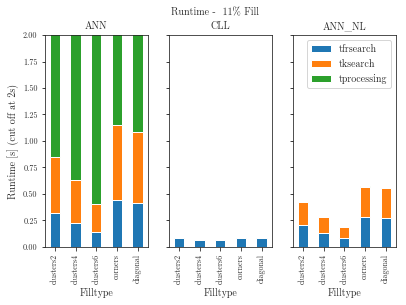

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

plotdf = df[df["fill"] == 11].groupby(["method", "filltype"]).mean()
plotdf.loc["ANN"].plot(y=["tfrsearch", "tksearch", "tprocessing"], ax=ax1, kind="bar", title="ANN",
                       stacked=True, legend=False)
plotdf.loc["CLL"].plot(y=["ttotal"],                             ax=ax2, kind="bar", title="CLL",
                      legend=False)
plotdf.loc["ANN-NL"].plot(y=["tfrsearch", "tksearch", "tprocessing"], ax=ax3, kind="bar", title="ANN_NL",
                          stacked=True, legend=True)


y_range = (0, 2)
ax1.set_ylim(y_range)
ax2.set_ylim(y_range)
plt.suptitle("Runtime -  11% Fill")
ax1.set(ylabel='Runtime [s] (cut off at 2s)', xlabel='Filltype')
ax2.set(ylabel='', xlabel='Filltype')
ax3.set(ylabel='', xlabel='Filltype')
savefig('runtime_fill11')
plt.show()

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


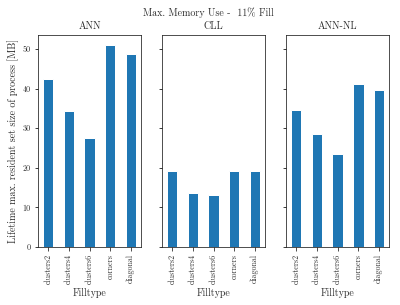

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

plotdf = df[df["fill"] == 11].groupby(["method", "filltype"]).mean()
plotdf.loc["ANN"].plot(y=["memory"],    ax=ax1,
                       kind="bar", title="ANN", legend=False)
plotdf.loc["CLL"].plot(y=["memory"],    ax=ax2,
                       kind="bar", title="CLL", legend=False)
plotdf.loc["ANN-NL"].plot(y=["memory"], ax=ax3,
                          kind="bar", title="ANN-NL", legend=False)

ax1.set(
    ylabel='Lifetime max. resident set size of process [MB]', xlabel='Filltype')
ax2.set(ylabel='', xlabel='Filltype')
ax3.set(ylabel='', xlabel='Filltype')
plt.suptitle("Max. Memory Use -  11% Fill")
savefig('memory_fill11')
plt.show()

## Effect of fill

In [16]:
df.groupby(["method", "filltype","fill"]).mean().reset_index(level=[1,2]).sort_values("fill")

,filltype,fill,ndatapts,ttotal,tksearch,tfrsearch,tprocessing,listmethod,memory
method,,,,,,,,,
CLL,corners,2,7200,0.019208,0.000000,0.000000,0.000000,-1,8.8360
ANN,corners,2,7200,63.401400,0.125416,0.089454,63.170640,0,16.0200
ANN-NL,corners,2,7200,0.147615,0.068417,0.065853,0.000193,-1,13.9272
ANN,clusters2,11,27648,792.699000,0.528472,0.315752,791.792800,0,42.4552
CLL,corners,11,28158,0.080319,0.000000,0.000000,0.000000,-1,19.2456
CLL,clusters6,11,27648,0.066576,0.000000,0.000000,0.000000,-1,13.0264
CLL,clusters4,11,27648,0.067759,0.000000,0.000000,0.000000,-1,13.4952
CLL,clusters2,11,27648,0.078372,0.000000,0.000000,0.000000,-1,19.1832
ANN-NL,diagonal,11,29424,0.610629,0.280569,0.275499,0.000794,-1,39.5344


'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


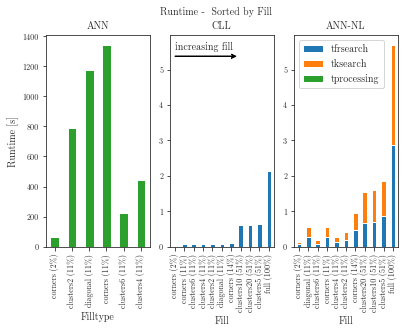

In [17]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)# , sharey = True)

# preoprocessing of filltype to add fill percent to label
add_pct_to_fill = lambda row: "{} ({}%)".format(row['filltype'],row['fill'])
plotdf = df.groupby(["method", "filltype","fill"]).mean().reset_index(level=[1,2]).sort_values("fill")
plotdf["filltype"] = plotdf.apply (lambda row: add_pct_to_fill(row),axis=1)

plotdf.loc["ANN"   ].plot(y=["tfrsearch","tksearch","tprocessing"], x="filltype", ax = ax1, kind="bar", 
                          title="ANN", stacked=True, legend=False)
plotdf.loc["CLL"   ].plot(y=["ttotal"],                             x="filltype", ax = ax2, kind="bar", 
                          title="CLL", legend = False)
plotdf.loc["ANN-NL"].plot(y=["tfrsearch","tksearch","tprocessing"], x="filltype", ax = ax3, kind="bar", 
                          title="ANN-NL", stacked=True)


start, end = ax3.get_ylim()
ax2.set_ylim(start,end)

firstcolumn, lastcolumn = map(int, ax2.get_xlim())
maxy = ax2.get_ylim()[1]
arrowy = maxy * 0.9
texty = maxy * 0.92
textx = 0
hw = maxy * 0.02
hl = (lastcolumn - firstcolumn) * 0.05
ax2.arrow(firstcolumn, arrowy,6,0, head_width=hw, head_length=0.5, fc='k', ec='k', overhang = 0.5)
ax2.text(textx, texty, 'increasing fill', ha="left", va="bottom")


ax1.set(ylabel='Runtime [s]', xlabel='Filltype')
ax2.set(ylabel='', xlabel='Fill')
ax3.set(ylabel='', xlabel='Fill')
plt.suptitle("Runtime -  Sorted by Fill")

savefig('runtime_filltypes')
plt.show()

/home/jens/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


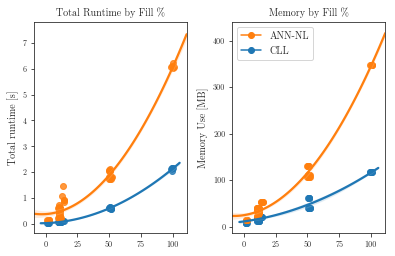

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2)
plotdf = df[df["method"] != "ANN"]
plt.subplots_adjust(wspace=0.3)

sns.regplot(ax = ax1, x="fill", y="ttotal", order=2,x_jitter=1,
                  data=plotdf[plotdf["method"] == "CLL"], color=sns.color_palette()[0],)
sns.regplot(ax = ax1, x="fill", y="ttotal", order=2,x_jitter=1,
                  data=plotdf[plotdf["method"] == "ANN-NL"],color=sns.color_palette()[1],)

sns.regplot(ax = ax2, x="fill", y="memory", order=2,x_jitter=1,
                  data=plotdf[plotdf["method"] == "CLL"],color=sns.color_palette()[0],)
sns.regplot(ax = ax2, x="fill", y="memory", order=2,x_jitter=1,
                  data=plotdf[plotdf["method"] == "ANN-NL"],color=sns.color_palette()[1], )

ax1.set(xlabel=''        , ylabel='Total runtime [s]', title="Total Runtime by Fill %")
ax2.set(xlabel=''        , ylabel='Memory Use [MB]'                , title="Memory by Fill %")

# legend
import matplotlib.lines as mlines
blue = mlines.Line2D([], [], color=sns.color_palette()[0], marker='o', label='CLL')
yellow = mlines.Line2D([], [], color=sns.color_palette()[1], marker='o', label='ANN-NL')

plt.legend(handles=[yellow, blue])

savefig("runtime_vs_fill")
plt.show()

Many different distributions at 11% fill, so regression not quite acurate

correlation of memory use and total time

# Unused
## ANN runtime influences

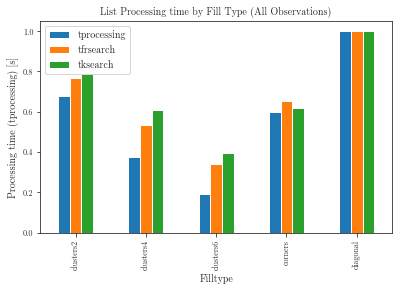

In [19]:
fig, ax1 = plt.subplots()

# scale to max
plotdf = df[df["method"] == "ANN"].groupby('filltype').mean()
columns_to_normalize = ['tprocessing', 'tfrsearch', 'tksearch']
for c in columns_to_normalize:
    plotdf[c] = plotdf[c] / plotdf[c].max()
    
plotdf.plot(ax=ax1, kind="bar", y=["tprocessing","tfrsearch","tksearch"])


ax1.set(ylabel='Processing time (tprocessing) [s]', xlabel='Filltype')
plt.title("List Processing time by Fill Type (All Observations)")
plt.show()

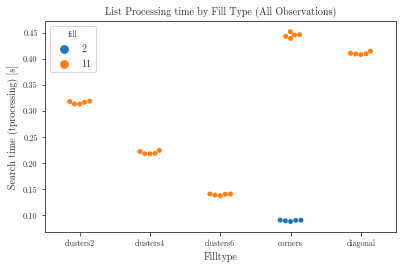

In [20]:
fig, ax1 = plt.subplots()

ax1 = sns.swarmplot(x="filltype", y="tfrsearch", hue="fill", dodge=False,
                data=df[df["method"] == "ANN"])

ax1.set(ylabel='Search time (tprocessing) [s]', xlabel='Filltype')
plt.title("List Processing time by Fill Type (All Observations)")
plt.show()

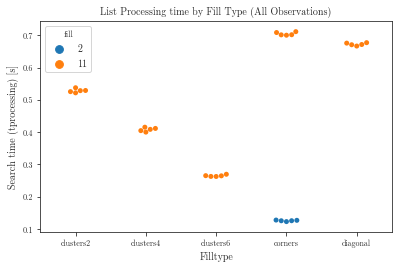

In [21]:
fig, ax1 = plt.subplots()

ax1 = sns.swarmplot(x="filltype", y="tksearch", hue="fill", dodge=False,
                data=df[df["method"] == "ANN"])

ax1.set(ylabel='Search time (tprocessing) [s]', xlabel='Filltype')
plt.title("List Processing time by Fill Type (All Observations)")
plt.show()

Rememer that time are cumulative over many query points! When a point has many neighors, the list processing algorithm must be called many times -> higher processing time. But ksearch and frsearch are called once per query point. Why the time difference?